<a href="https://colab.research.google.com/github/Shivam10816/CS22M082_ASSIGNEMNT_1/blob/q2/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wandb
import wandb
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fe3c824904e55db74a1e69b0ebb198af7e5be5656e6ccb6ac045ce7807196f69
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
4422102/

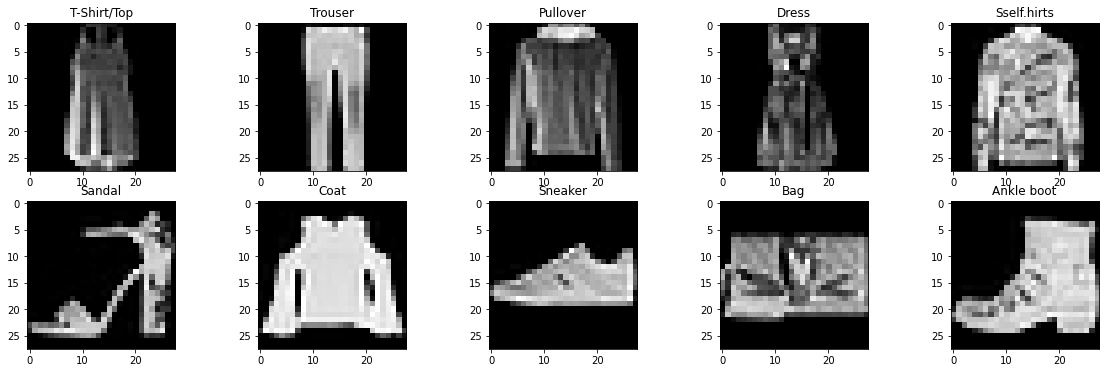

In [ ]:
wandb.init(project = "Assignment 1" ,name = "Question 1")


titles = ["T-Shirt/Top","Trouser","Pullover","Dress","Sself.hirts","Sandal","Coat","Sneaker","Bag","Ankle boot"]
fig,axs = plt.subplots(2,5,figsize=(20,6))
axs =axs.flatten()
images=[]
for i in range(0,10):
  index =random.choice(np.where(train_labels==i)[0])
  
  axs[i].imshow(train_data[index],cmap="gray")
  axs[i].set_title(titles[i])
  Img = wandb.Image(train_data[index],caption=[titles[i]])
  images.append(Img)
wandb.log({"examples":images})
  

In [ ]:

train_data = np.reshape(train_data,(len(train_data),train_data.shape[1]**2))
test_data = np.reshape(test_data,(len(test_data),test_data.shape[1]**2))
test_labels =np.reshape(test_labels,(1,len(test_data)))


In [ ]:
wandb.init(project = "Assignment 1" ,name = "Question 1")

In [41]:


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = np.reshape(train_data/255.0,(len(train_data),train_data.shape[1]**2))
test_data = np.reshape(test_data/255.0,(len(test_data),test_data.shape[1]**2))
test_labels =np.reshape(test_labels,(1,len(test_data)))


class neural_network:

  #it initializes W and b
  def __init__(self,train_data,train_label,hi):
    
    self.train_data=train_data
    self.train_label=train_label
    self.rndm()
  
  def xav(self):
    l= train_data.shape[1]

    self.W =[self.xavier_init(hi[0],l)] 
    self.b =[self.xavier_init(1,hi[0])]
    for i in range(1,len(hi)) :
      self.W.append(self.xavier_init(hi[i],hi[i-1]))
      self.b.append(self.xavier_init(1,hi[i])) 
    self.W.append(self.xavier_init(10,hi[-1]))
    
    self.b.append(self.xavier_init(1,10))
  

  def rndm(self):
    l= train_data.shape[1]

    self.W =[np.random.randn(hi[0],l)] 
    self.b =[np.zeros((1,hi[0]))]
    for i in range(1,len(hi)) :
      self.W.append(np.random.randn(hi[i],hi[i-1]))
      self.b.append(np.zeros((1,hi[i]))) 
    self.W.append(np.random.randn(10,hi[-1]))
    
    self.b.append(np.random.randn(1,10))
  
  def WX_plus_B(self,W, X, b):
    
    result = np.dot(X, W.transpose())
    row_count = result.shape[0]
    
    row_matrix_repeated = np.tile(b, (row_count, 1))
    return result + row_matrix_repeated

    
  def xavier_init(self,input_size, output_size):
    """
    Initialize weights using Xavier initialization.

    Parameters:
    input_size (int): number of input units.
    output_size (int): number of output units.

    Returns:
    weights (ndarray): array of shape (input_size, output_size) containing the initialized weights.
    """
    # Calculate the variance of the weights
    variance = 2.0 / (input_size + output_size)

    # Calculate the standard deviation of the weights
    standard_deviation = np.sqrt(variance)

    # Generate random weights from a normal distribution with mean 0 and standard deviation standard_deviation
    weights = np.random.normal(loc=0, scale=standard_deviation, size=(input_size, output_size))

    return weights

  #calculates sigmoid for matrix
  def sigmoid(self,x):
  
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
  
  def sum_columns(self,matrix):
    if isinstance(matrix, np.ndarray):
        # if matrix is a numpy array, convert it to a list
        matrix = matrix.tolist()
    
    # sum the elements of each column and store in a list
    column_sums = [sum(col) for col in zip(*matrix)]
    
    # convert the list to a 2D matrix of shape (1 x n)
    row_matrix = np.array([column_sums])
    
    return row_matrix
  #softmax for matrix
  def softmax(self,x):
    # Subtract the maximum value in each row from all the values in that row
    # to prevent numerical instability from very large or very small values
    # in the exponentials of the softmax function.
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)
  
  def subtract_matrices(self,W, W_theta, step_size):
    """
    Subtract the matrices in the second list from the matrices in the first list, after multiplying the matrices in the
    second list by a step size.

    Args:
        first_list (list): A list of numpy arrays representing the first set of matrices.
        second_list (list): A list of numpy arrays representing the second set of matrices.
        step_size (float): The step size to multiply the second set of matrices by.

    Returns:
        list: A list of numpy arrays representing the result of subtracting the second set of matrices from the first set
        of matrices after multiplying the second set of matrices by the step size.
    """
    result_list = []
    for i in range(len(self.W)):
        result = W[i] - step_size * (W_theta[i])
        result_list.append(result)
    return result_list

  def sigmoid_derivative(self,matrix):
    """
    Calculate the derivative of the sigmoid function on a 2D matrix.

    Args:
        matrix (numpy.ndarray): A numpy array representing the matrix.

    Returns:
        numpy.ndarray: A numpy array representing the result of calculating the sigmoid derivative on the matrix.
    """
    shift = np.max(matrix, axis=1, keepdims=True)
    exp_matrix = np.exp(matrix - shift)
    sig = 1 / (1 + exp_matrix)
    return sig * (1 - sig)

  def forward_pro(self,X,W,b):
    A=[]
    H=[]
    A.append(self.WX_plus_B(W[0],X,b[0])) # a0 = WoX +bo

    for i in range(1,len(hi)):

      H.append(self.sigmoid(A[-1])) # hi = g(ai)
      #print(H[i-1])
      A.append( self.WX_plus_B(W[i],H[-1],b[i])) # ai = WiX +bi

    H.append(self.sigmoid(A[-1]))
    A.append(self.WX_plus_B(W[-1],H[-1],b[-1]))
    
    y_hat = self.softmax((A[-1]))
    
    
    
    return A,H,y_hat

  def back_prop(self,X,Y,A,H,y_hat):
    W_theta , b_theta,H_theta,A_theta =[],[],[],[]
    #print(np.argmax(y_hat),lable)
    ey = np.zeros((y_hat.shape[0],y_hat.shape[1]))

    for i in range(0,len(Y)):
      ey[i][Y[i]]=1
  
    L =len(A)
    A_theta.append((-(ey-y_hat)))
    
    #-------------------------
    for k in range(L-1,0,-1):
      
      W_theta.append((np.matmul(A_theta[-1].transpose(),H[k-1])+self.reg*self.W[k]) ) # athetak*h[k-1]
      b_theta.append( self.sum_columns(A_theta[-1]))
      H_theta.append(np.matmul(A_theta[-1],self.W[k]))
  
      A_theta.append(H_theta[-1]*self.sigmoid_derivative(A[k-1]))

    W_theta.append((np.matmul(A_theta[-1].transpose(),X)+self.reg*self.W[0]))
    b_theta.append(self.sum_columns(A_theta[-1]))

    W_theta.reverse()
    b_theta.reverse()

    self.cross_entropy(y_hat,Y)
    
    
    return W_theta , b_theta

  def accuracy(self, X_test, y_test):
    
    # Feed forward through the network
    A,H,y_hat =self.forward_pro(X_test,self.W,self.b)
    
    
    y_pred = np.argmax(y_hat, axis=1)
    print(y_pred.shape)
    # Calculate accuracy
    acc = np.mean(y_pred == y_test)
    # Calculate accuracy
    

    return acc
  def cross_entropy(self,y_hat,Y):
      sum=0.0;
      for i in range(0,len(Y)):
        sum+=(-np.log2(y_hat[i][Y[i]]))
      sum/= float(len(Y))
      print(sum)
  
  def sgd(self,step_size,batch_size,epoch,reg):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg
    for e in range(0,epoch):
      start_time = time.time()
      for k in range(0,N):
          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)
          self.b =self.subtract_matrices(self.b,db,step_size)
          self.W =self.subtract_matrices(self.W,dW,step_size)
          
          
      print("epoch ",e ,"  %s seconds " % (time.time() - start_time))
  def mbgd(self,step_size,batch_size,epoch,beta,reg):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    prev_ub , prev_uw =[],[]

    for i in range(len(self.W)):
      prev_ub.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      prev_uw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))


    
    for e in range(0,epoch):
      start_time = time.time()
      for k in range(0,N):
          ub,uw = list(prev_ub),list(prev_uw)

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            ub[i]= beta*prev_ub[i] + db[i]
            uw[i]= beta*prev_uw[i] + dW[i]
          self.b =self.subtract_matrices(self.b,ub,step_size)
          self.W =self.subtract_matrices(self.W,uw,step_size)

          prev_ub , prev_uw = list(ub),list(uw)
  def nagd(self,step_size,batch_size,epoch,beta,reg):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    prev_ub , prev_uw =[],[]

    for i in range(len(self.W)):
      prev_ub.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      prev_uw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))


    n_w ,n_b =self.subtract_matrices(self.W,prev_uw,beta),self.subtract_matrices(self.b,prev_ub,beta)
    for e in range(0,epoch):
      start_time = time.time()
      for k in range(0,N):
          ub,uw = list(prev_ub),list(prev_uw)

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,n_w,n_b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            ub[i]= beta*prev_ub[i] + db[i]
            uw[i]= beta*prev_uw[i] + dW[i]
          self.b =self.subtract_matrices(self.b,ub,step_size)
          self.W =self.subtract_matrices(self.W,uw,step_size)

          prev_ub , prev_uw = list(ub),list(uw)
    

     
      
hi=[32,32,32]   
Net = neural_network(train_data,train_labels,hi)

#print("accuracy :-",Net.accuracy(test_data,test_labels)*100,"%")
#Net.sgd(0.1,32,10,0)
Net.mbgd(0.1,32,10,0,0)
("accuracy :-",Net.accuracy(test_data,test_labels)*100,"%")


Streaming output truncated to the last 5000 lines.
2.390551080186449
1.634798629633929
2.118439425179065
2.1298334721582295
2.233496039665041
2.084244048427168
2.0506053491511738
2.058201710709777
1.5329338750194101
2.208461931243922
1.6035385160603461
1.9973546511095235
2.0057830771238785
1.9760870565373552
1.7466282777932127
1.6940361868197462
2.288745315070482
2.1115351384424157
1.9489428586203434
2.1993236178820315
2.0590449203932857
1.901627052045931
1.981130645919169
1.8204475795527664
2.030706531489705
2.021266668304076
1.903967409773112
1.9050808758207953
1.8385864112126142
1.7643326242108135
1.7624018119499139
1.8464121413155283
1.7873926091781525
1.8876699687617189
1.4531387772212963
1.5298328653935225
1.6781968594792
1.896973847487734
1.8080031889164114
2.2882567621206715
2.131475219917191
2.1615462568341126
1.9322207864263505
1.7418166771925447
2.0132901923137774
2.1540379727734504
1.9516621386833022
1.442146011791434
1.7406065182610078
1.7874643933270415
1.8601496124565937

('accuracy :-', 44.519999999999996, '%')

In [35]:
Net.accuracy(test_data,test_labels)*100

TypeError: ignored

TypeError: ignored

In [ ]:
print(test_data.shape)
print(test_labels.shape)